<a href="https://colab.research.google.com/github/powernv/python_DA/blob/main/%D0%94%D0%971_%22without_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson1/hometask/without_pandas.ipynb)

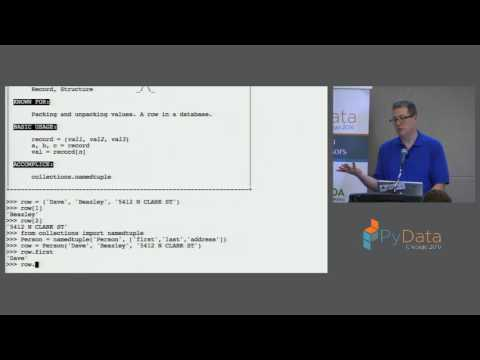

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyDLAutA88s', width=800, height=300)

In [ ]:
# 1. Посмотрите видео Дэвида Бизли про встроенные инструменты Python
# 2. Попробуйте используя встроенные инструменты Python проанализировать таблицу из файла "Vacancy.csv"
# 3. Попробуйте ответить на вопросы:
# Сколько вакансий, которые вам нравятся?
# За какие периоды эти вакансии?
# Сколько вакансий с такими позициями, на которых вы работаете?
# Сколько вакансий для аналитика данных?
# Сколько вакансий для аналитика данных с использованием Python?

# В задании важно не использовать pandas и numpy, а встроенные инструменты python
# Counter, CSV, defaultdict, sorted

In [1]:
# Colab Version
!pip install wget
!wget https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson1/hometask/vacancy.csv.zip
!unzip vacancy.csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5c5c23e3cbd64d61964fcc9a53faab9b91e7d83758166809f568bd642c33ce8f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2022-07-28 20:07:50--  https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson1/hometask/vacancy.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3029239 (2.9M) [application/zip]
Saving to: ‘vacancy.csv.zip’

vacancy.csv.zip     100%[===================>]   2.89M  --.-KB/s    in 0.07s   

2022-07-28 20:07:51 (42.9 MB/s) - ‘vacancy.csv.zip’ saved [3029239/302

In [2]:
import csv
from collections import Counter, defaultdict

In [3]:
file_path = 'vacancy.csv'
vacs = list(csv.DictReader(open(file_path)))

In [4]:
vacs[0]

OrderedDict([('id', '383479'),
             ('created_at', '2021-03-14 09:39:21.854462'),
             ('updated_at', '2021-03-14 09:39:21.854584'),
             ('vacid', '1474941'),
             ('vactitle', 'Senior java-разработчик (в команду Онбординга)'),
             ('vacdescription',
              ' Работа у нас — это:команда профессионалов, готовых поддержать ваши инициативы;мощное железо, дополнительные мониторы и всё, что нужно для продуктивной работы;обучение за счёт компании;гибкий графиккрасивый и комфортный офис  г. Санкт-Петербург, м. Ладожская  пл. Карла Фаберже 8 ВДМС;прозрачная система бонусов и премий, достойная зарплата — размер обсудим на собеседовании.Информация о проекте:Наша команда делает новые экспериментальные фичи для СБОЛа.Сейчас мы разрабатываем систему, с помощью которой разные команды Сбера смогут создавать квесты для мобильного приложения.Также мы будем разрабатывать внутреннюю платформу для продуктовых экспериментов. Описание команды:2-pizza team: сей

In [5]:
len(vacs)

4002

In [6]:
vactitles = {row ['vactitle'] for row in vacs}
print(len(vactitles))

2167


In [7]:
titles = Counter(row ['vactitle'] for row in vacs)
top_titles = titles.most_common(15)
top_titles

[('Мобильный менеджер по продажам', 229),
 ('Старший менеджер по обслуживанию', 172),
 ('Специалист по прямым продажам', 164),
 ('Менеджер по продажам', 86),
 ('Системный аналитик', 62),
 ('Менеджер по работе с ключевыми клиентами малого бизнеса', 53),
 ('Java разработчик', 40),
 ('Водитель-инкассатор', 38),
 ('Старший специалист по взысканию задолженности', 38),
 ('Главный клиентский менеджер малого бизнеса', 34),
 ('Главный инженер по разработке', 25),
 ('Менеджер по продаже зарплатных проектов', 25),
 ('Java-разработчик', 24),
 ('Ведущий инженер по сопровождению', 22),
 ('Практикант', 22)]

Сколько вакансий, которые вам нравятся?

Ответ: 27

In [8]:
like = [row['vactitle'] for row in vacs if 'аналитик' in row['vactitle'].lower() and 'python' in row['vacdescription'].lower() and 'sql' in row['vacdescription'].lower() and 'анализ' in row['vacdescription'].lower() and not 'системный'in row['vactitle'].lower() and not 'бизнес'in row['vactitle'].lower()]

In [8]:
len(like)

27

За какие периоды вакансии, которые вам нравятся?

In [9]:
{row['vacstatus'] for row in vacs}

{'new'}

In [10]:
{row['created_at'] for row in vacs if row['vactitle'] in like}

{'2021-03-14 09:39:21.854462'}

In [11]:
{row['updated_at'] for row in vacs if row['vactitle'] in like}

{'2021-03-14 09:39:21.854584'}

In [12]:
vacdates = [row['vacdate'] for row in vacs if row['vactitle'] in like]

In [13]:
likes = [row for row in vacs if 'аналитик' in row['vactitle'].lower() and 'python' in row['vacdescription'].lower() and 'sql' in row['vacdescription'].lower() and 'анализ' in row['vacdescription'].lower() and not 'системный'in row['vactitle'].lower() and not 'бизнес' in row['vactitle'].lower()]

In [14]:
len(likes)

27

In [15]:
periods = defaultdict(list)

In [16]:
for row in likes: 
  periods['title'].append(row['vactitle'])
  periods['date'].append(row['vacdate'])

In [17]:
i = 0 
while i < len(likes):
  print(periods['title'][i], periods['date'][i], end='\n')
  i+=1

Аналитик SQL (кампании продаж) 2021-03-15
Data analyst. Аналитик данных в трайб «Массовая персонализация». 2021-03-12
Analyst (Аналитик, команда Клиентской аналитики, Корп.блок) 2021-03-10
Ведущий аналитик данных . Руководитель направления Дивизион `Массовая персонализация` 2021-03-09
Ведущий аналитик 2021-03-04
Финансовый аналитик 2021-03-03
Руководитель команды Отчетность и Аналитика 2021-03-02
Ведущий аналитик 2021-03-02
Аналик SQL. Аналитик crm.Менеджер сегментации клиентской базы 2021-03-01
Аналитик данных 2021-02-25
Аналитик баз данных 2021-02-24
Ведущий аналитик Центра рисков розничного взыскания 2021-02-24
Аналитик (кампании продаж) 2021-02-16
Data Аналитик 2021-02-11
Руководитель направления по аналитике данных 2021-02-08
Эксперт по аналитике 2021-02-05
Продуктовый аналитик в рекомендательную систему 2021-02-04
Аналитик 2021-02-03
Аналитик в команду исследования клиентской удовлетворенности 2021-02-02
Data analyst. Стажера - Аналитик (кластер Персональные предложения) 2021-01-

In [18]:
a = sorted(periods['date'])[0]
b = sorted(periods['date'])[len(periods['date'])-1]
print(f'Вакансии опубликованы в период с {a} по {b}')

Вакансии опубликованы в период с 2020-12-04 по 2021-03-16


Сколько вакансий с такими **позициями**, на которых **вы работаете**?

Ответ: 8

In [19]:
auditors = [row for row in vacs if row['vactitle'].lower().find('аудитор')>-1]
len(auditors)


18

In [20]:
auditors_count = Counter([row['vactitle'][:15] for row in vacs if row['vactitle'].lower().find('аудитор')>-1])
auditors_count.most_common()

[('Старший аудитор', 8),
 ('Ведущий аудитор', 5),
 ('Аудитор', 3),
 ('Главный аудитор', 1),
 ('Аудитор (с навы', 1)]

In [21]:
my_position= [row['vactitle'] for row in vacs if row['vactitle'].lower().startswith('старший аудитор')]
len(my_position)

8

Сколько вакансий для аналитика данных?

Ответ: 55

In [22]:
analysts = [row['vactitle'] for row in vacs if row['vactitle'].lower().find('аналитик')>-1]
len(analysts)

389

In [23]:
analysts_count = Counter(analysts)

In [24]:
analysts_count.most_common(10)

[('Системный аналитик', 62),
 ('Аналитик', 16),
 ('Старший кредитный аналитик', 12),
 ('Бизнес-аналитик', 8),
 ('Ведущий аналитик', 5),
 ('Аналитик данных', 5),
 ('Главный аналитик', 5),
 ('Аналитик ОД', 4),
 ('Системный аналитик DWH', 3),
 ('Ведущий аналитик данных', 2)]

In [25]:
analysts1 = [row['vactitle'] for row in vacs if row['vactitle'].lower().find('аналитик big data')>-1]
analysts1

['Аналитик Big Data', 'Аналитик Big Data']

In [26]:
analysts2 = [row['vactitle'] for row in vacs if row['vactitle'].lower().find('data analyst')>-1]
len(analysts2)


22

In [27]:
analysts1.extend(analysts2)
len(analysts1)

24

In [28]:
analysts3 = [row['vactitle'] for row in vacs if row['vactitle'].replace('-', ' ').lower().find('data аналитик')>-1]
analysts3

['Senior Data аналитик', 'Data Аналитик']

In [29]:
analysts4 = [row['vactitle'] for row in vacs if row['vactitle'].lower().find('аналитик баз данных')>-1]
analysts4

['Аналитик баз данных',
 'Разработчик-Аналитик баз данных',
 'Аналитик баз данных']

In [30]:
analysts3.extend(analysts4)
analysts3

['Senior Data аналитик',
 'Data Аналитик',
 'Аналитик баз данных',
 'Разработчик-Аналитик баз данных',
 'Аналитик баз данных']

In [31]:
analysts1.extend(analysts3)
len(analysts1)

29

In [32]:
analysts5 = [row['vactitle'] for row in vacs if (row['vactitle'].lower().find('аналитик данных')>-1)]
len(analysts5)

21

In [33]:
analysts1.extend(analysts5)
len(analysts1)

50

Сколько вакансий для аналитика данных с использованием Python?

Ответ: 25

In [34]:
analysts1_python = [row['vactitle'] for row in vacs if row['vactitle'] in analysts1 and 'python' in row['vacdescription'].lower()]
len(analysts1_python)

25